# Using Perceptron Model (Only input layer and Output Layer)

In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

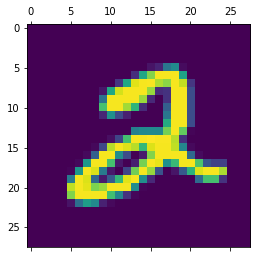

In [6]:
plt.matshow(X_train[5])

In [7]:
y_train[5]


2

In [8]:
X_train = X_train / 255
X_test = X_test / 255


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7225 - accuracy: 0.8080
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3074 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2796 - accuracy: 0.9220
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2717 - accuracy: 0.9233: 0s - loss: 0.2716 - accuracy: 
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2680 - accuracy: 0.9255


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2684 - accuracy: 0.9258


[0.26836469769477844, 0.9258000254631042]

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.8692940e-02, 1.6979735e-07, 8.1779778e-02, 9.5058304e-01,
       2.3221672e-03, 1.1610636e-01, 1.7063114e-06, 9.9968350e-01,
       1.0818204e-01, 6.2492537e-01], dtype=float32)

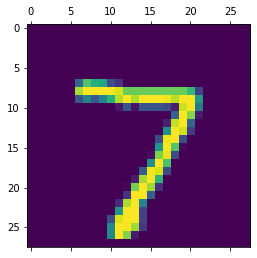

In [19]:
plt.matshow(X_test[0])

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1105,    3,    2,    1,    1,    5,    2,   16,    0],
       [   7,    7,  922,   16,    8,    3,   12,   11,   43,    3],
       [   4,    0,   20,  917,    0,   25,    2,   11,   23,    8],
       [   2,    1,    3,    2,  922,    0,   11,    3,   10,   28],
       [  10,    1,    3,   31,   11,  776,   16,    6,   33,    5],
       [  13,    3,    4,    2,    7,   11,  914,    2,    2,    0],
       [   1,    5,   22,    7,   10,    0,    0,  946,    3,   34],
       [   7,    4,    6,   20,    9,   26,    9,    8,  879,    6],
       [  11,    5,    1,   12,   32,    7,    0,   19,    9,  913]])>

Text(69.0, 0.5, 'Truth')

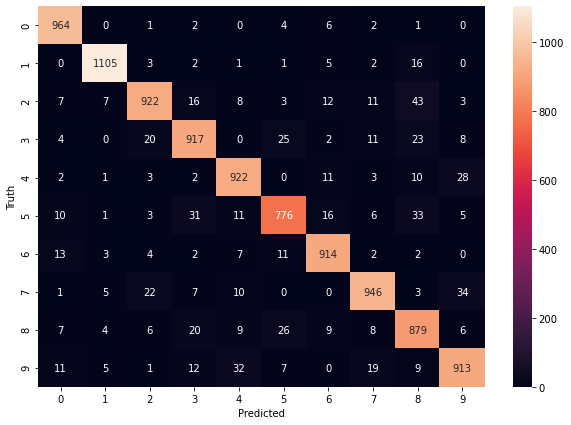

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

TypeError: 'History' object is not subscriptable

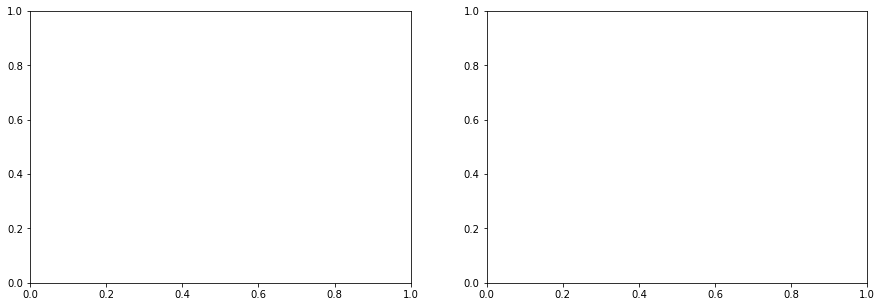

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(model.history['accuracy'])
axes[0].plot(model.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy on Training','Accuracy on Testing'])
axes[0].grid(True)

axes[1].plot(model.history['loss'])
axes[1].plot(model.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Error')
axes[1].legend(['Error on Training','Error on Testing'])
axes[1].grid(True)